# **Análisis Exploratorio de los Datos (EDA)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
df = pd.read_csv("credit_card_transactions.csv")

In [3]:
# Mostrar primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [5]:
df.describe()

,TransactionID,Amount,MCC,TransactionSpeed,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,547.347491,5950.102900,30.738446,0.019200
std,2886.89568,460.047329,664.526287,19.092345,0.137234
min,1.00000,10.090000,5261.000000,0.110000,0.000000
25%,2500.75000,263.222500,5411.000000,14.910000,0.000000
50%,5000.50000,512.240000,5812.000000,29.655000,0.000000
75%,7500.25000,759.935000,5968.000000,45.270000,0.000000
max,10000.00000,4988.070000,7299.000000,119.860000,1.000000


## Preprocesamiento de los Datos

In [6]:
# Conversión de tipos de datos
df['TransactionID'] = df['TransactionID'].astype(str)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['CardholderName'] = df['CardholderName'].astype('category')
df['MerchantName'] = df['MerchantName'].astype('category')
df['MCC'] = df['MCC'].astype(str)
df['Location'] = df['Location'].astype('category')
df['Device'] = df['Device'].astype('category')
df['IPAddress'] = df['IPAddress'].astype(str)
df['TransactionSpeed'] = df['TransactionSpeed'].astype('category')
df['Fraud'] = df['Fraud'].astype(int)

In [7]:
print(df.dtypes)

TransactionID               object
Time                datetime64[ns]
Amount                     float64
CardholderName            category
MerchantName              category
MCC                         object
Location                  category
Device                    category
IPAddress                   object
TransactionSpeed          category
Fraud                        int64
dtype: object


In [8]:
# Verificar si existen valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64


In [9]:
# Elimina filas que son completamente duplicadas en todas las columnas
df = df.drop_duplicates()

In [10]:
#Elimina filas que tengan el mismo TransactionID
df = df.drop_duplicates(subset='TransactionID')

In [11]:
# Visualización de outliers con boxplots antes de eliminarlos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

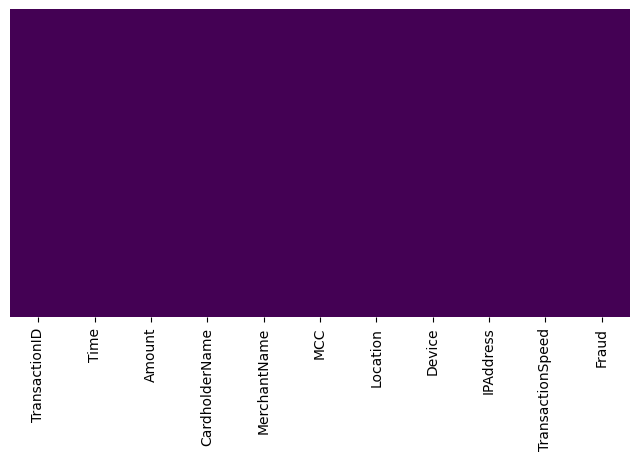

In [12]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [13]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv("credit_card_transactions_limpio.csv", index=False)

## Visualización de los Datos

In [14]:
df = pd.read_csv("credit_card_transactions_limpio.csv")

<ipython-input-15-b3c31e6834d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud', data=df, palette='Set2')


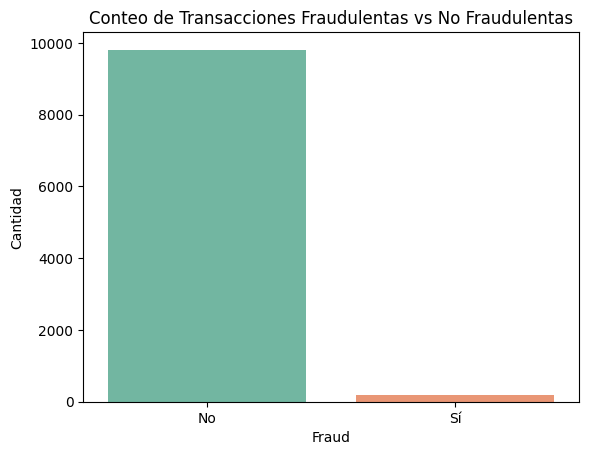

Fraud
0    98.08
1     1.92
Name: proportion, dtype: float64


In [15]:
sns.countplot(x='Fraud', data=df, palette='Set2')
plt.title("Conteo de Transacciones Fraudulentas vs No Fraudulentas")
plt.xticks([0,1], ['No', 'Sí'])
plt.ylabel("Cantidad")
plt.show()

# Porcentaje
porcentaje = df['Fraud'].value_counts(normalize=True) * 100
print(porcentaje)

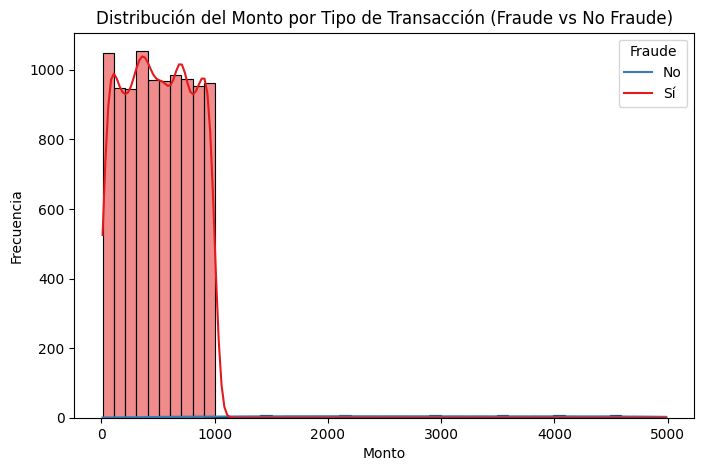

In [16]:
# Distribución del monto
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Amount', hue='Fraud', kde=True, palette='Set1', bins=50)
plt.title("Distribución del Monto por Tipo de Transacción (Fraude vs No Fraude)")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()

<ipython-input-17-ff25f1b1b6f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud', y='Amount', data=df, palette='Set2')


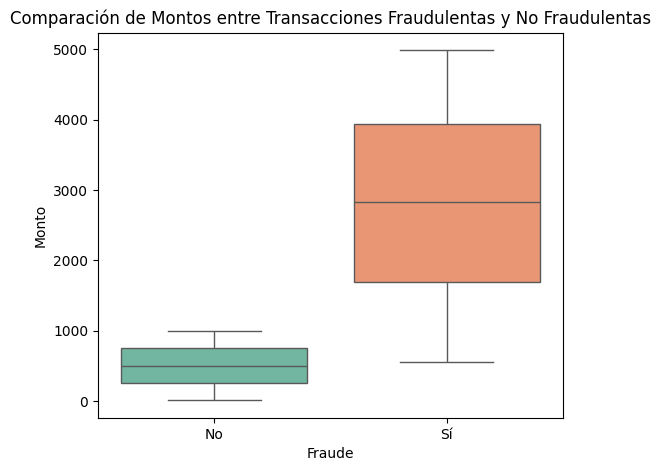

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Fraud', y='Amount', data=df, palette='Set2')
plt.title("Comparación de Montos entre Transacciones Fraudulentas y No Fraudulentas")
plt.xlabel("Fraude")
plt.ylabel("Monto")
plt.xticks([0,1], ['No', 'Sí'])
plt.show()

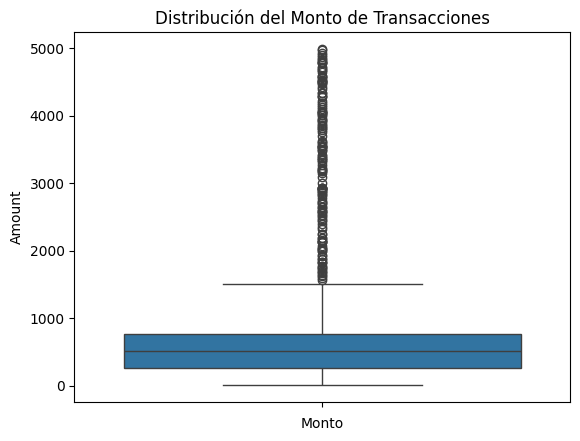

In [18]:
sns.boxplot(y='Amount', data=df)
plt.title("Distribución del Monto de Transacciones")
plt.xlabel("Monto")
plt.show()

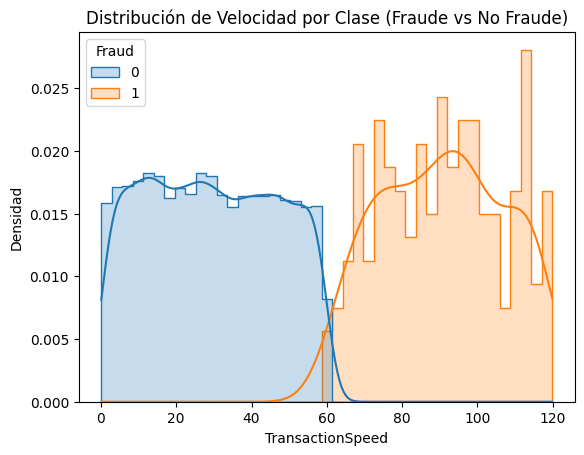

In [19]:
sns.histplot(data=df, x='TransactionSpeed', hue='Fraud', kde=True, element='step', stat='density', common_norm=False)
plt.title("Distribución de Velocidad por Clase (Fraude vs No Fraude)")
plt.xlabel("TransactionSpeed")
plt.ylabel("Densidad")
plt.show()

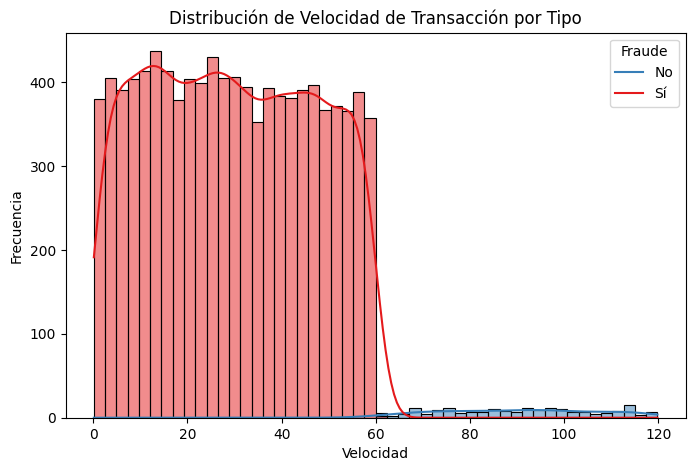

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TransactionSpeed', hue='Fraud', kde=True, palette='Set1', bins=50)
plt.title("Distribución de Velocidad de Transacción por Tipo")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()

In [21]:
df_temp = df.copy()

In [22]:
df_temp['Time'] = pd.to_datetime(df_temp['Time'])

# Crear el segundo DataFrame con nuevas columnas extraídas
df_extendido = df_temp.copy()
df_extendido['Hour'] = df_temp['Time'].dt.hour
df_extendido['Day'] = df_temp['Time'].dt.day
df_extendido['Month'] = df_temp['Time'].dt.month
df_extendido['Weekday'] = df_temp['Time'].dt.weekday  # 0=Lunes, 6=Domingo

# (Opcional) Mostrar las primeras filas del nuevo DataFrame extendido
print(df_extendido.head())

   TransactionID                Time  Amount     CardholderName  \
0              1 2025-03-09 06:23:57   83.54       Sarah Murray   
1              2 2025-02-14 05:17:36  805.88   Alexander Brooks   
2              3 2024-05-03 15:28:52  450.49       Harold Perez   
3              4 2024-05-03 09:01:14  782.39      Rebecca Davis   
4              5 2025-04-24 17:24:39  713.02  Lauren Benson DDS   

     MerchantName   MCC            Location   Device        IPAddress  \
0  Oconnor-Hughes  5411            Longtown  Android    102.247.49.50   
1        Reed PLC  5261           Woodsland      POS     153.157.50.7   
2       Berry LLC  5261         Jessicatown      iOS  151.174.154.123   
3        Berg Inc  5968  North Krystalburgh  Android    130.70.79.149   
4     King-Gaines  5968   East Danielletown  Android   195.136.16.190   

   TransactionSpeed  Fraud  Hour  Day  Month  Weekday  
0             38.17      0     6    9      3        6  
1             49.84      0     5   14      2  

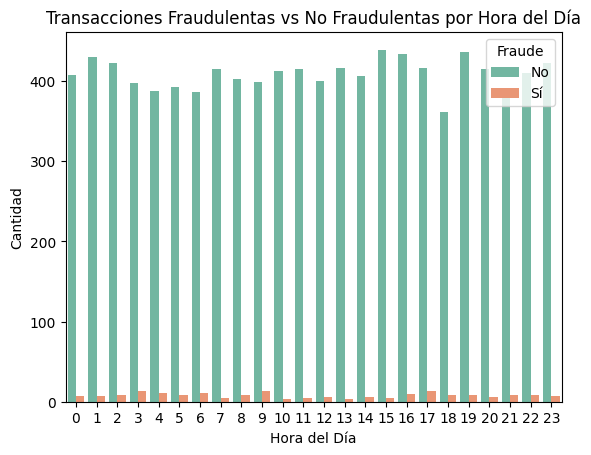

In [23]:
df_extendido['Fraud'] = df_extendido['Fraud'].astype(str)

sns.countplot(x='Hour', hue='Fraud', data=df_extendido, palette='Set2')
plt.title("Transacciones Fraudulentas vs No Fraudulentas por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()

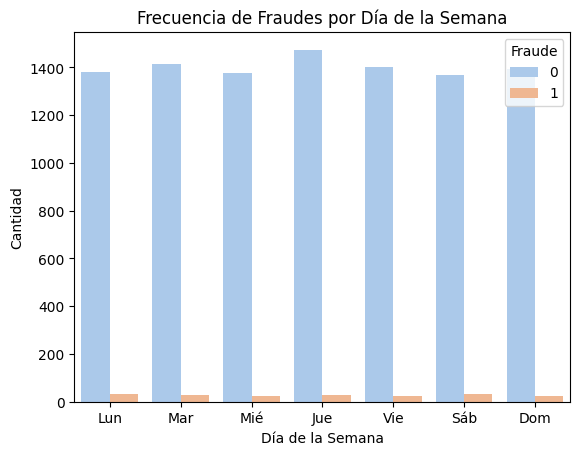

In [24]:
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
sns.countplot(x='Weekday', hue='Fraud', data=df_extendido, palette='pastel')
plt.title("Frecuencia de Fraudes por Día de la Semana")
plt.xticks(ticks=range(7), labels=dias)
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad")
plt.legend(title="Fraude")
plt.show()

In [25]:
df_feature = df_temp.copy()

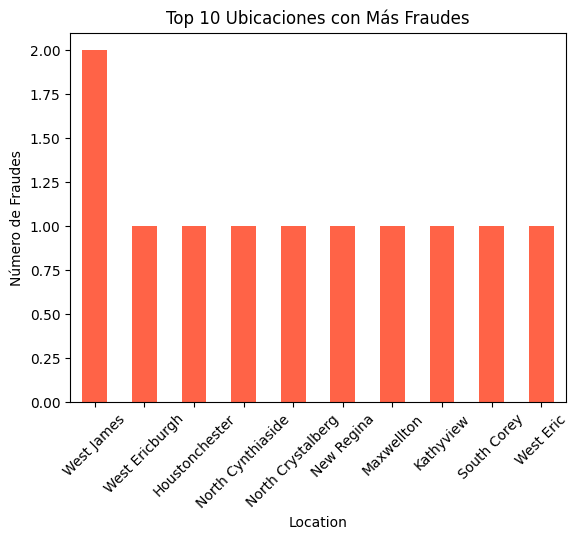

In [26]:
top_locs = df_feature[df_feature['Fraud'] == 1]['Location'].value_counts().head(10)
top_locs.plot(kind='bar', color='tomato')
plt.title("Top 10 Ubicaciones con Más Fraudes")
plt.ylabel("Número de Fraudes")
plt.xticks(rotation=45)
plt.show()

# **Preprocesamiento de los Datos**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Cargar dataset
df = pd.read_csv("/content/credit_card_transactions_limpio.csv")

In [29]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [30]:
# Conversión de tipos
df['TransactionID'] = df['TransactionID'].astype(str)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Variables categóricas
categorical_cols = [
    'CardholderName',
    'MerchantName',
    'MCC',
    'Location',
    'Device',
    'TransactionSpeed'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

# IP como string
df['IPAddress'] = df['IPAddress'].astype(str)

# Etiqueta objetivo
df['Fraud'] = df['Fraud'].astype(int)

In [31]:
# Mostrar primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     10000 non-null  object        
 1   Time              10000 non-null  datetime64[ns]
 2   Amount            10000 non-null  float64       
 3   CardholderName    10000 non-null  category      
 4   MerchantName      10000 non-null  category      
 5   MCC               10000 non-null  category      
 6   Location          10000 non-null  category      
 7   Device            10000 non-null  category      
 8   IPAddress         10000 non-null  object        
 9   TransactionSpeed  10000 non-null  category      
 10  Fraud             10000 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.6+ MB


## Selección de variables para el modelado

In [33]:
# Definir características y variable objetivo
features = ['Amount', 'MCC', 'Location', 'Device', 'TransactionSpeed']
X = df[features]
y = df['Fraud']

## Codificación de variables categóricas

In [34]:
X_encoded = pd.get_dummies(X, columns=['MCC', 'Location', 'Device', 'TransactionSpeed'], drop_first=True)

# Verificación
print("Dimensiones después del encoding:", X_encoded.shape)
print("Columnas resultantes:", X_encoded.columns.tolist())

Dimensiones después del encoding: (10000, 12714)
Columnas resultantes: ['Amount', 'MCC_5411', 'MCC_5812', 'MCC_5942', 'MCC_5968', 'MCC_7299', 'Location_Aaronshire', 'Location_Abigailchester', 'Location_Abigailhaven', 'Location_Abigailstad', 'Location_Acevedoside', 'Location_Acostachester', 'Location_Acostafort', 'Location_Acostaport', 'Location_Adamborough', 'Location_Adamchester', 'Location_Adamland', 'Location_Adamsburgh', 'Location_Adamsfurt', 'Location_Adamshire', 'Location_Adamside', 'Location_Adamsshire', 'Location_Adamsstad', 'Location_Adamsville', 'Location_Adamview', 'Location_Adamville', 'Location_Adkinston', 'Location_Adrianberg', 'Location_Adrianbury', 'Location_Adrianfort', 'Location_Adrianview', 'Location_Adrienneport', 'Location_Adrienneshire', 'Location_Aguilarside', 'Location_Aguilartown', 'Location_Alanberg', 'Location_Alanbury', 'Location_Alanmouth', 'Location_Alanstad', 'Location_Alanton', 'Location_Alanview', 'Location_Alanville', 'Location_Alecborough', 'Location_

## Normalización de variables numéricas

In [35]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar la columna 'Amount'
X_encoded['Amount'] = scaler.fit_transform(X_encoded[['Amount']])

# Verificar resultado
print(X_encoded[['Amount']].describe())

             Amount
count  1.000000e+04
mean   2.614797e-16
std    1.000050e+00
min   -1.167889e+00
25%   -6.176304e-01
50%   -7.631660e-02
75%    4.621223e-01
max    9.653234e+00


## División del conjunto de datos en conjuntos

In [36]:
# Separamos en 70% entrenamiento y 30% restante
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.30, random_state=42, stratify=y)

# Separamos en 15% validación y 15% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Mostrar tamaños
print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Validación: {len(X_val)} muestras")
print(f"Prueba: {len(X_test)} muestras")

Entrenamiento: 7000 muestras
Validación: 1500 muestras
Prueba: 1500 muestras


## Manejar el desbalance de clases

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificamos el nuevo balance
print("Distribución después de SMOTE:")
print(y_train_resampled.value_counts())

Distribución después de SMOTE:
Fraud
0    6866
1    6866
Name: count, dtype: int64


# **Modelado**

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

MLPClassifier(max_iter=300, random_state=42)

In [43]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Ajuste de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPClassifier(max_iter=300), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# **Evaluacion**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
# Evaluación de GaussianNB
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluación de MLPClassifier
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Función para imprimir métricas
def evaluar_modelo(nombre, y_test, y_pred, y_proba):
    print(f"\n--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall (Fraude):", recall_score(y_test, y_pred, pos_label=1))
    print("Precision (Fraude):", precision_score(y_test, y_pred, pos_label=1))
    print("F1-Score (Fraude):", f1_score(y_test, y_pred, pos_label=1))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")

# Ejecutar para ambos modelos
evaluar_modelo("GaussianNB", y_test, y_pred_nb, y_proba_nb)
evaluar_modelo("MLPClassifier", y_test, y_pred_mlp, y_proba_mlp)

# Graficar curvas ROC
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()

# Identificar características importantes con permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(mlp, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importances = result.importances_mean
features = X_test.columns  # o la lista de nombres si es un array

# Mostrar las características más importantes
for i in importances.argsort()[::-1]:
    print(f"{features[i]}: {importances[i]:.4f}")